Lets see what we can do with a wordmap (plot, noise reduction and possibly partitioning into morphemes?)

In [63]:
import wordmapper
import text_utilities as tu
import numpy as np # arrays
import scipy.stats as stats # arithmetics
import matplotlib.pyplot as pp # plotting

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
pc = tu.PosCorpus('../data/experiment/verbs/joined/')

targets = "bescheidgeben"
wm_mt = []
for t in targets.split(","):
    wm = wordmapper.WordMapper(t, pc.counted_corpus)
    mt = wordmapper.MapToken(t, wm.wordmap, pc.metrics)
    wm_mt.append((mt.token, mt.wordmap))

In [79]:
def plot_targets(maptokens, absolute=False, zscore=False, med=False, std=False, mean=False, mmmix=False, zeroline=False, derive=False):
    for (target, wm) in maptokens:

        arr = np.array(wm)
        wm_med = np.array([np.median(wm) for i in wm])
        wm_mea = np.array([np.mean(wm) for i in wm])
        wm_std = np.array([np.std(wm) for i in wm])
        wm_mix = [(x+y)/2 for x, y, in zip(wm_mea, wm_med)]
        wm_zero = [0 for i in range(len(arr))]
        wm_derive = np.array(stats.zscore(tu.derive_wordmap(wm)))
        wm_zscore = np.array(stats.zscore(arr))

        if absolute:
            pp.plot(range(len(arr)), arr)
        if med:
            pp.plot(range(len(arr)), wm_med)
        if mean:
            pp.plot(range(len(arr)), wm_mea)
        if std:
            pp.plot(range(len(arr)), wm_std)
        if mmmix:
            pp.plot(range(len(arr)), wm_mix)
        if zscore:
            pp.plot(range(len(arr)), wm_zscore)
        if zeroline:
            pp.plot(range(len(arr)), wm_zero)
        if derive:
            pp.plot(range(len(arr)), wm_derive)


    pp.xlabel('Character positions')
    pp.ylabel('Frequency')
    pp.xticks(np.arange(stop=len(arr),step=1), labels=list(target))
    pp.show()
    pp.clf()

[5661, 4340, 1037, 385, 385, 30, 16, 4, 54, 172, 277, 3344, 3946] [ 2.10284605 -0.46287757 -1.41254175 -0.64327978  0.99452465  0.5687416
 -0.34783745 -0.04247628 -1.09843599 -0.85963477 -0.36901387  0.00871081
  1.56127438]


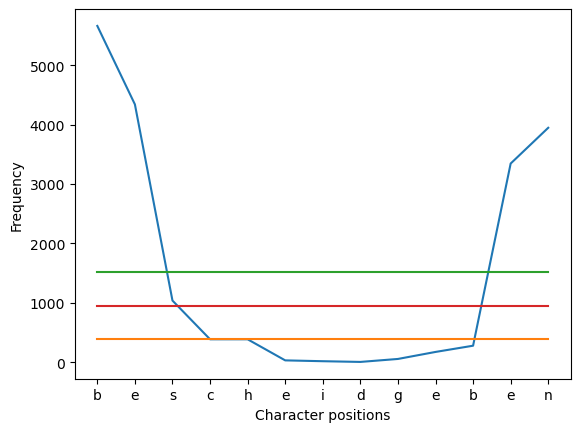

<Figure size 640x480 with 0 Axes>

In [81]:
plot_targets(
    maptokens=wm_mt,
    absolute=True,
    med=  True,
    mmmix=True,
    mean= True,
    zscore=  False,
    zeroline=False,
    derive=  False
)

In [72]:
def signaltonoise(a, axis=0, ddof=0):
    """
    The signal-to-noise ratio of the input data.
    Returns the signal-to-noise ratio of `a`, here defined as the mean
    divided by the standard deviation.
    Parameters
    ----------
    a : array_like
        An array_like object containing the sample data.
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    ddof : int, optional
        Degrees of freedom correction for standard deviation. Default is 0.
    Returns
    -------
    s2n : ndarray
        The mean to standard deviation ratio(s) along `axis`, or 0 where the
        standard deviation is 0.
    """
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

([<matplotlib.axis.XTick at 0x7faf67be5e10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

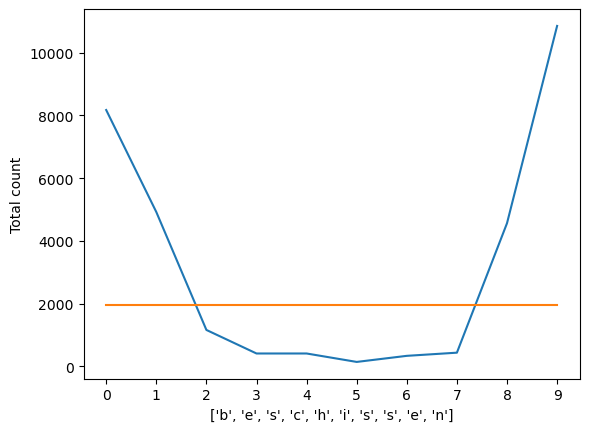

In [52]:
print(signaltonoise(wordmap1))

0.6054367328205298


In [27]:
S = np.fft.fft(mt.wordmap)

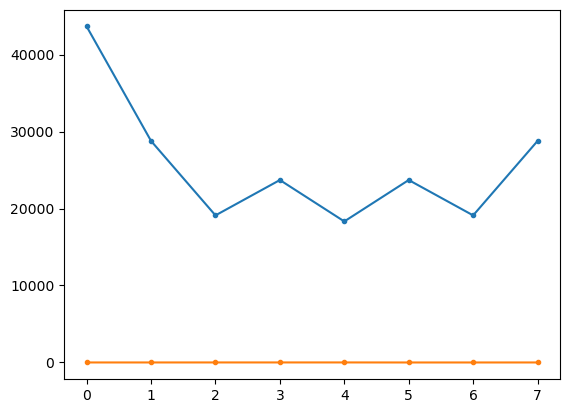

In [28]:
t = np.arange(8)
#s = np.sin(0.15*2*np.pi*t)

S_mag = np.abs(S)
S_phase = np.angle(S)
pp.plot(t,S_mag,'.-')
pp.plot(t,S_phase,'.-')

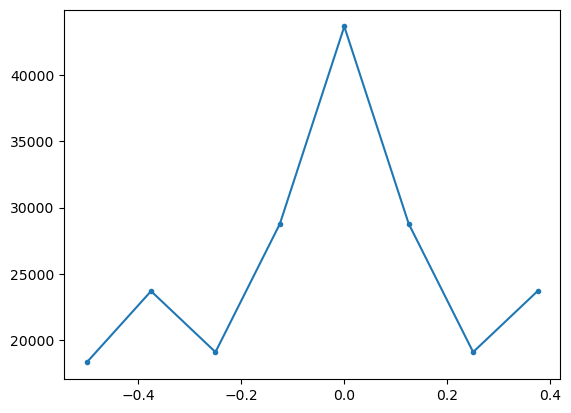

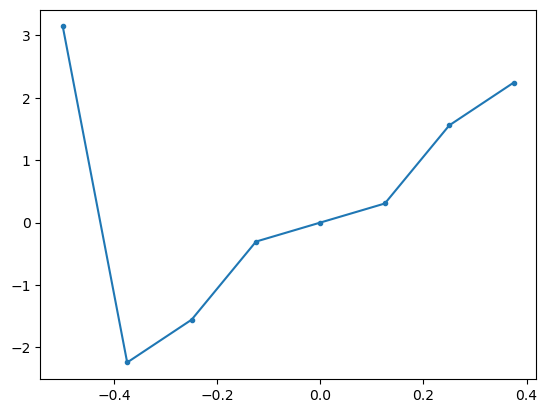

In [30]:
Fs = 1 # Hz
N = 8 # number of points to simulate, and our FFT size

t = np.arange(N) # because our sample rate is 1 Hz

S = np.fft.fftshift(np.fft.fft(mt.wordmap))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
pp.figure(0)
pp.plot(f, S_mag,'.-')
pp.figure(1)
pp.plot(f, S_phase,'.-')
pp.show()

In [84]:
wm1 = wordmapper.WordMapper("ernten", pc.counted_corpus)

In [85]:
wm1.wordmap

[744, 322, 12, 437, 3345, 3939]

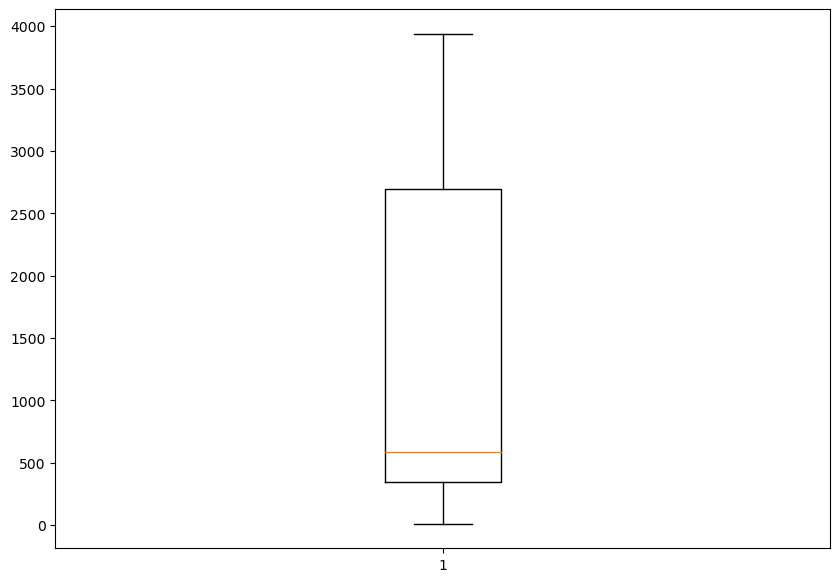

In [86]:
# Creating dataset

data = wm1.wordmap

fig = pp.figure(figsize =(10, 7))

# Creating plot
pp.boxplot(data)

# show plot
pp.show()